In [2]:
import pandas as pd

path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\ansett.csv"

df = pd.read_csv(path)
df.head()

,Week,Airports,Class,Passengers
0,1989 W28,ADL-PER,Business,193
1,1989 W29,ADL-PER,Business,254
2,1989 W30,ADL-PER,Business,185
3,1989 W31,ADL-PER,Business,254
4,1989 W32,ADL-PER,Business,191


In [8]:
df['timestamp'] = pd.to_datetime(df['Week'] + '-1', format='%Y W%W-%w')
df.head()

,Week,Airports,Class,Passengers,timestamp
0,1989 W28,ADL-PER,Business,193,1989-07-10
1,1989 W29,ADL-PER,Business,254,1989-07-17
2,1989 W30,ADL-PER,Business,185,1989-07-24
3,1989 W31,ADL-PER,Business,254,1989-07-31
4,1989 W32,ADL-PER,Business,191,1989-08-07


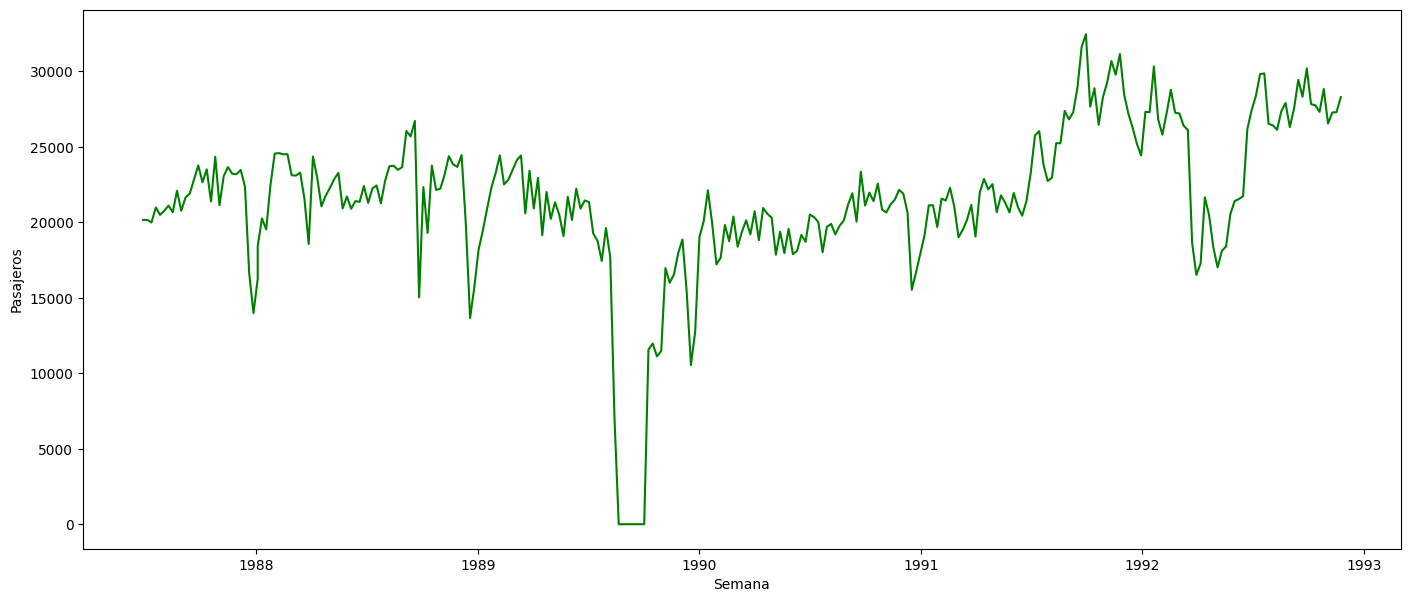

In [9]:
df1 = df[(df['Airports']=='MEL-SYD') & (df['Class']=='Economy')]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(17, 7))
ax.plot(df1['timestamp'], df1['Passengers'], c='green')
ax.set_xlabel('Semana')
ax.set_ylabel('Pasajeros')
plt.show()

In [10]:
path2 = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\a10.csv"

df_a10 = pd.read_csv(path2)
df_a10.head()

,Date,Sales
0,1991.500000,3.526591
1,1991.583333,3.180891
2,1991.666667,3.252221
3,1991.750000,3.611003
4,1991.833333,3.565869


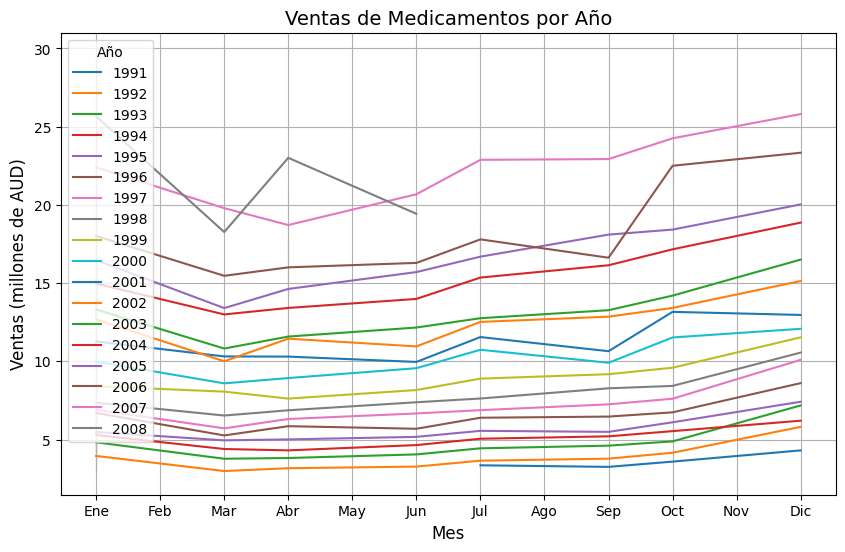

In [11]:
import seaborn as sns
# Convertir el formato de la columna 'Date' (año fraccionado) a año y mes
df_a10['Year'] = df_a10['Date'].astype(int)
df_a10['Month'] = ((df_a10['Date'] % 1) * 12 + 1).astype(int)  # Convertir la parte decimal a mes
df_a10['Date'] = pd.to_datetime(df_a10[['Year', 'Month']].assign(DAY=1))  # Crear fecha con día 1 del mes

# Crear gráfico
plt.figure(figsize=(10,6))

# Graficar una línea por año con diferentes colores
sns.lineplot(x='Month', y='Sales', hue='Year', data=df_a10, palette='tab10')

# Ajustar etiquetas y títulos
plt.title('Ventas de Medicamentos por Año', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas (millones de AUD)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar la leyenda y el gráfico
plt.legend(title='Año')
plt.grid(True)
plt.show()

In [12]:
df_a10.head()

,Date,Sales,Year,Month
0,1991-07-01,3.526591,1991,7
1,1991-07-01,3.180891,1991,7
2,1991-09-01,3.252221,1991,9
3,1991-10-01,3.611003,1991,10
4,1991-10-01,3.565869,1991,10


In [13]:
df_a10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    204 non-null    datetime64[ns]
 1   Sales   204 non-null    float64       
 2   Year    204 non-null    int32         
 3   Month   204 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 4.9 KB


In [3]:
path3 = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\vic_elec.csv"

df_ve = pd.read_csv(path3)
df_ve.head()

,Time,Demand,Temperature,Date,Holiday
0,2011-12-31T13:00:00Z,4382.825174,21.40,2012-01-01,True
1,2011-12-31T13:30:00Z,4263.365526,21.05,2012-01-01,True
2,2011-12-31T14:00:00Z,4048.966046,20.70,2012-01-01,True
3,2011-12-31T14:30:00Z,3877.563330,20.55,2012-01-01,True
4,2011-12-31T15:00:00Z,4036.229746,20.40,2012-01-01,True


In [7]:
df_ve['Time'] = pd.to_datetime(df_ve['Time'])
df_ve['year'] = df_ve['Time'].dt.year
df_ve.head()

,Time,Demand,Temperature,Date,Holiday,year
0,2011-12-31 13:00:00+00:00,4382.825174,21.40,2012-01-01,True,2011
1,2011-12-31 13:30:00+00:00,4263.365526,21.05,2012-01-01,True,2011
2,2011-12-31 14:00:00+00:00,4048.966046,20.70,2012-01-01,True,2011
3,2011-12-31 14:30:00+00:00,3877.563330,20.55,2012-01-01,True,2011
4,2011-12-31 15:00:00+00:00,4036.229746,20.40,2012-01-01,True,2011


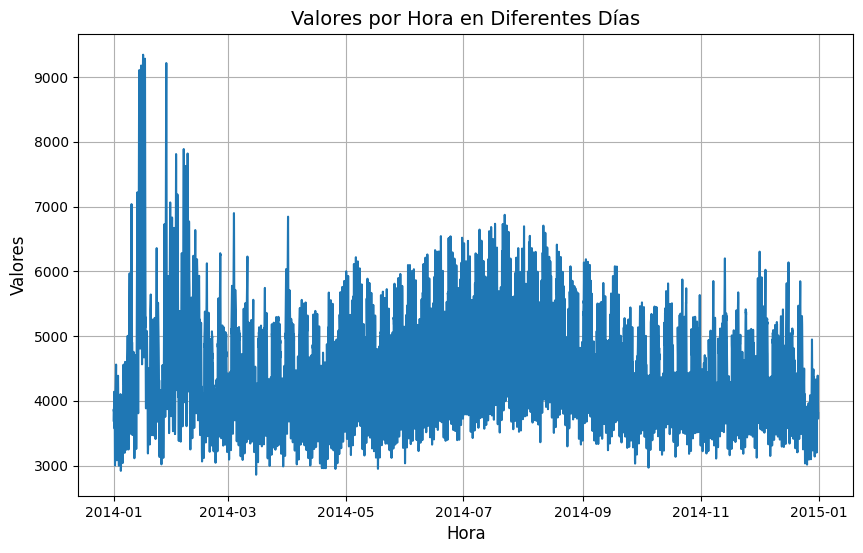

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
df_ve_2014 = df_ve[df_ve['year']==2014]
plt.figure(figsize=(10,6))

# Graficar una línea por cada día, con colores diferentes
sns.lineplot(x='Time', y='Demand', data=df_ve_2014, legend=False)

# Ajustar etiquetas y títulos
plt.title('Valores por Hora en Diferentes Días', fontsize=14)
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Valores', fontsize=12)

# Mostrar leyenda y gráfico
plt.grid(True)
plt.show()

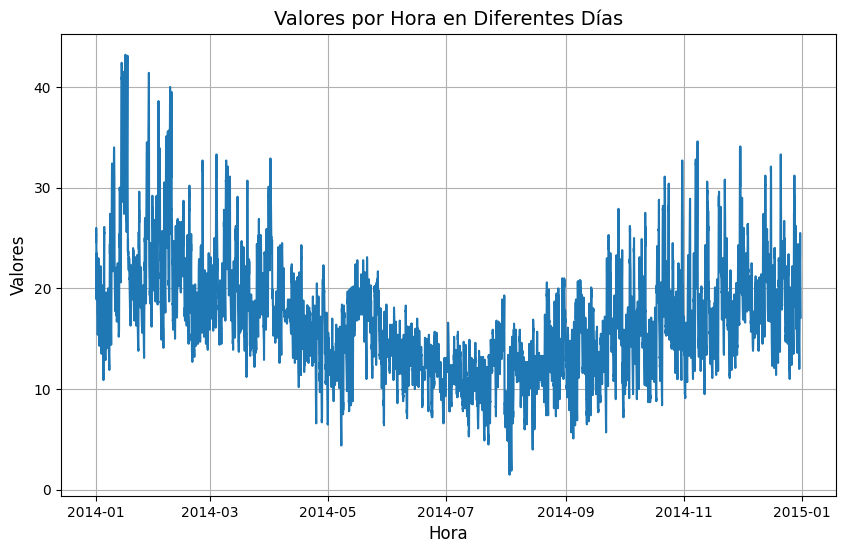

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
df_ve_2014 = df_ve[df_ve['year']==2014]
plt.figure(figsize=(10,6))

# Graficar una línea por cada día, con colores diferentes
sns.lineplot(x='Time', y='Temperature', data=df_ve_2014, legend=False)

# Ajustar etiquetas y títulos
plt.title('Valores por Hora en Diferentes Días', fontsize=14)
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Valores', fontsize=12)

# Mostrar leyenda y gráfico
plt.grid(True)
plt.show()

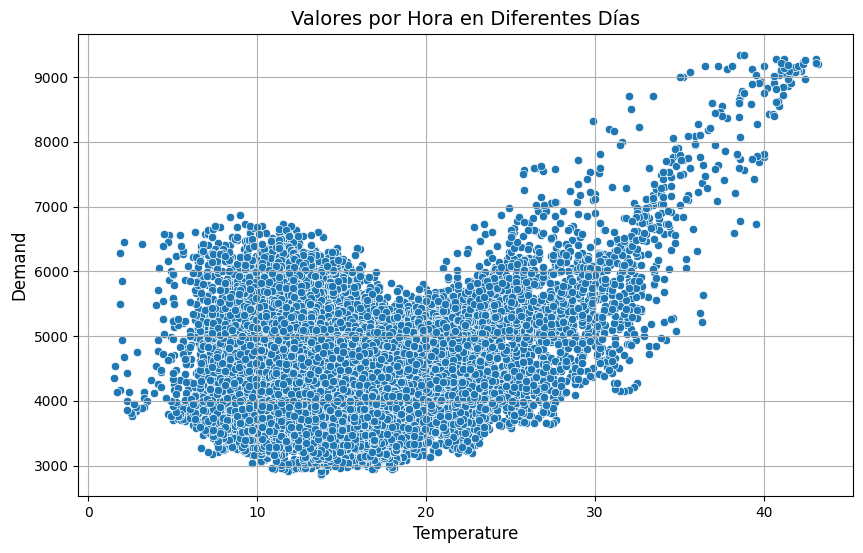

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
df_ve_2014 = df_ve[df_ve['year']==2014]
plt.figure(figsize=(10,6))

# Graficar una línea por cada día, con colores diferentes
sns.scatterplot(x='Temperature', y='Demand', data=df_ve_2014, legend=False)

# Ajustar etiquetas y títulos
plt.title('Valores por Hora en Diferentes Días', fontsize=14)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Demand', fontsize=12)

# Mostrar leyenda y gráfico
plt.grid(True)
plt.show()

In [16]:
import numpy as np
np.corrcoef(df_ve_2014['Temperature'], df_ve_2014['Demand'])

array([[1.        , 0.28089437],
       [0.28089437, 1.        ]])

In [15]:
df_ve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         52608 non-null  object 
 1   Demand       52608 non-null  float64
 2   Temperature  52608 non-null  float64
 3   Date         52608 non-null  object 
 4   Holiday      52608 non-null  bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 1.7+ MB


In [16]:
df_ve['Time'] = pd.to_datetime(df_ve['Time'])
df_ve['date'] = df_ve['Time'].dt.date
# df_ve['time'] = df_ve['Time'].dt.time
df_ve['time'] = pd.to_datetime(df_ve['Time'], format='%H:%M:%S').dt.time
df_ve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Time         52608 non-null  datetime64[ns, UTC]
 1   Demand       52608 non-null  float64            
 2   Temperature  52608 non-null  float64            
 3   Date         52608 non-null  object             
 4   Holiday      52608 non-null  bool               
 5   date         52608 non-null  object             
 6   time         52608 non-null  object             
dtypes: bool(1), datetime64[ns, UTC](1), float64(2), object(3)
memory usage: 2.5+ MB


In [17]:
df_ve['time_decimal'] = df_ve['time'].apply(lambda x: x.hour + x.minute/60)
df_ve.head()

,Time,Demand,Temperature,Date,Holiday,date,time,time_decimal
0,2011-12-31 13:00:00+00:00,4382.825174,21.40,2012-01-01,True,2011-12-31,13:00:00,13.0
1,2011-12-31 13:30:00+00:00,4263.365526,21.05,2012-01-01,True,2011-12-31,13:30:00,13.5
2,2011-12-31 14:00:00+00:00,4048.966046,20.70,2012-01-01,True,2011-12-31,14:00:00,14.0
3,2011-12-31 14:30:00+00:00,3877.563330,20.55,2012-01-01,True,2011-12-31,14:30:00,14.5
4,2011-12-31 15:00:00+00:00,4036.229746,20.40,2012-01-01,True,2011-12-31,15:00:00,15.0


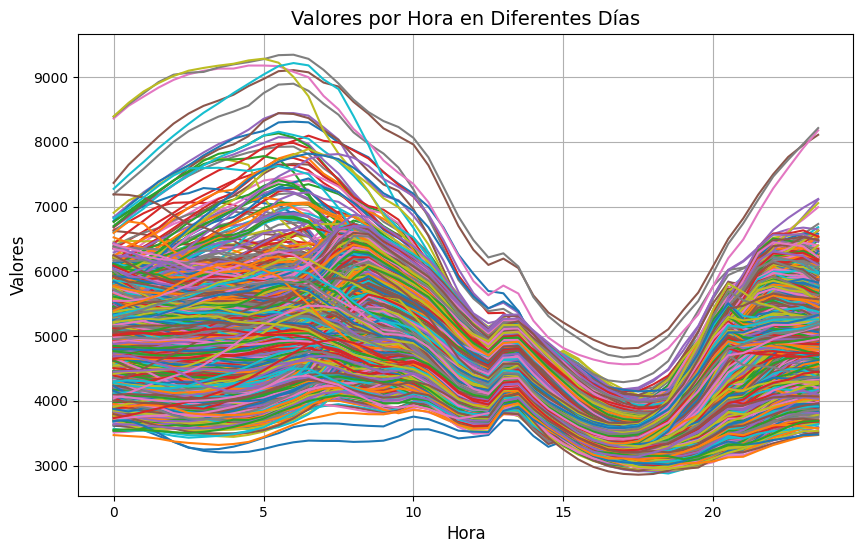

In [18]:
plt.figure(figsize=(10,6))

# Graficar una línea por cada día, con colores diferentes
sns.lineplot(x='time_decimal', y='Demand', hue='date', data=df_ve, palette='tab10', legend=False)

# Ajustar etiquetas y títulos
plt.title('Valores por Hora en Diferentes Días', fontsize=14)
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Valores', fontsize=12)

# Mostrar leyenda y gráfico
plt.grid(True)
plt.show()

In [19]:
df_ve['day_of_week'] = df_ve['Time'].dt.strftime('%A')
df_ve.head()

,Time,Demand,Temperature,Date,Holiday,date,time,time_decimal,day_of_week
0,2011-12-31 13:00:00+00:00,4382.825174,21.40,2012-01-01,True,2011-12-31,13:00:00,13.0,Saturday
1,2011-12-31 13:30:00+00:00,4263.365526,21.05,2012-01-01,True,2011-12-31,13:30:00,13.5,Saturday
2,2011-12-31 14:00:00+00:00,4048.966046,20.70,2012-01-01,True,2011-12-31,14:00:00,14.0,Saturday
3,2011-12-31 14:30:00+00:00,3877.563330,20.55,2012-01-01,True,2011-12-31,14:30:00,14.5,Saturday
4,2011-12-31 15:00:00+00:00,4036.229746,20.40,2012-01-01,True,2011-12-31,15:00:00,15.0,Saturday


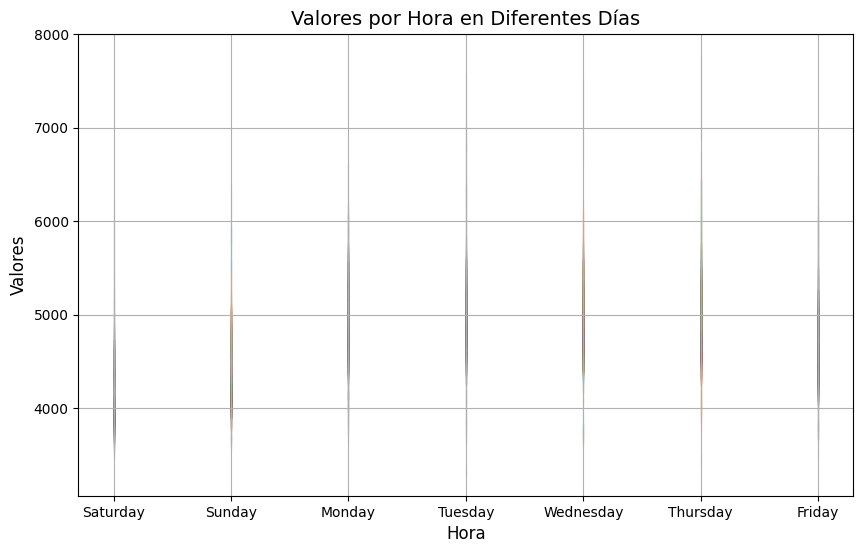

In [20]:
plt.figure(figsize=(10,6))

# Graficar una línea por cada día, con colores diferentes
sns.lineplot(x='day_of_week', y='Demand', hue='date', data=df_ve, palette='tab10', legend=False)

# Ajustar etiquetas y títulos
plt.title('Valores por Hora en Diferentes Días', fontsize=14)
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Valores', fontsize=12)

# Mostrar leyenda y gráfico
plt.grid(True)
plt.show()

In [23]:
path4 = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\tourism.csv"

df_t = pd.read_csv(path4)
df_t['quarter'] = df_t['Quarter'].str.extract(r'(Q\d)')
df_t.head()

,Quarter,Region,State,Purpose,Trips,quarter
0,1998 Q1,Adelaide,South Australia,Business,135.077690,Q1
1,1998 Q2,Adelaide,South Australia,Business,109.987316,Q2
2,1998 Q3,Adelaide,South Australia,Business,166.034687,Q3
3,1998 Q4,Adelaide,South Australia,Business,127.160464,Q4
4,1999 Q1,Adelaide,South Australia,Business,137.448533,Q1


In [29]:
df_th = df_t[df_t['Purpose']=='Holiday']
df_th_e = df_th.groupby(['State', 'Quarter']).agg({'Trips':'sum'}).reset_index()

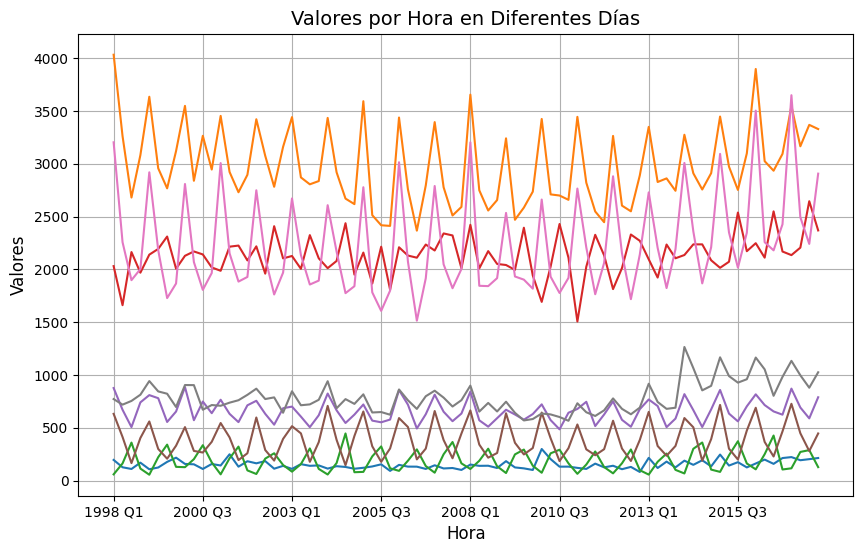

In [32]:
plt.figure(figsize=(10,6))

# Graficar una línea por cada día, con colores diferentes
sns.lineplot(x='Quarter', y='Trips', hue='State', data=df_th_e, palette='tab10', legend=False)

# Ajustar etiquetas y títulos
plt.title('Valores por Hora en Diferentes Días', fontsize=14)
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.xticks(ticks=plt.gca().get_xticks()[::10])

# Mostrar leyenda y gráfico
plt.grid(True)
plt.show()